In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

In [2]:
#load breast cancer dataset
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)

In [3]:
#Add target column
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data) 

In [4]:
#add column names
features = breast.feature_names 
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [5]:
#set columns 0-30 to feature X and column 31 to output Y
X = breast_dataset.iloc[:, 0:30].values
Y = breast_dataset.iloc[:, 30].values 

In [6]:
#split set into training(0.8) and validations(0.2) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
#apply standardarization to the training and testing sets
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [8]:
#Apply the LogisticRegression function to training set and build model
classifier = LogisticRegression(C=10, random_state=0) 
classifier.fit(X_train, Y_train)

#Apply the classifier model to the validation set
Y_pred = classifier.predict(X_test)

In [9]:
#calculate and output the accuracy, precision, and recall of the model
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9912280701754386
Precision: 0.9868421052631579
Recall: 1.0


In [10]:
#build a confusion matrix comparing predicted Y and actual Y from test sets
confusion_matrix = confusion_matrix(Y_test, Y_pred) 
confusion_matrix

array([[38,  1],
       [ 0, 75]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

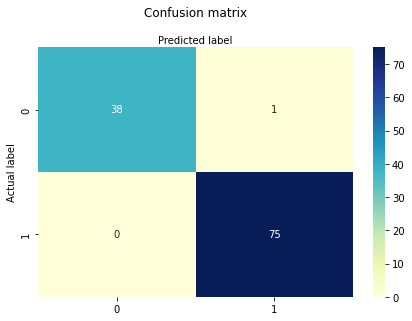

In [11]:
#plot the confusion matrix
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 